# Image Analysis

In this tutorial I will show you how to perform quality control on your image processing and segmentation results.

In [1]:
#lets take a quick look
import skimage.io as io
import numpy as np
import opendvp as dvp

import napari
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Part 1: Visualize segmentation in QuPath

QuPath is a great piece of software created to allow users to see their images in a smooth manner.

Here is our demo data, this is how it should look like

In [2]:
! tree

.
├── Tutorial_1.ipynb
├── data
│   ├── image
│   │   └── mIF.ome.tif
│   ├── manual_artefact_annotations
│   │   └── artefacts.geojson
│   ├── quantification
│   │   └── quant.csv
│   └── segmentation
│       └── segmentation_mask.tif
└── outputs
    └── segmentation_for_qupath.geojson

7 directories, 6 files


In [4]:
# let's perform some quick QC
path_to_segmentation = "data/segmentation/segmentation_mask.tif"
seg = io.imread(path_to_segmentation)

In [5]:
print(f"Number of pixels in x,y: {seg.shape}")
print(f"Number of segmented objects {np.unique(seg).size -1}")

Number of pixels in x,y: (5000, 5000)
Number of segmented objects 16808


/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_14111/2237838827.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(seg, vmax=1)


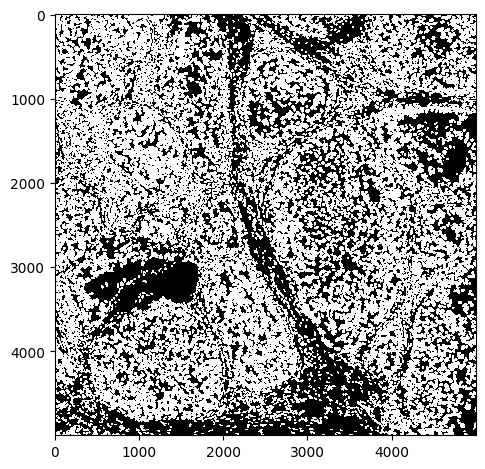

In [6]:
#quick look
io.imshow(seg, vmax=1)

## Let's visualize interactively in Napari or Qupath

### For Napari

In [9]:
#load image
image = io.imread("data/image/mIF.ome.tif")

In [10]:
# this should produce a napari window with image and segmentation mask
viewer = napari.Viewer()
viewer.add_image(image, name="mIF_image")
viewer.add_labels(seg, name='Segmentation')

<Labels layer 'Segmentation' at 0x2b9e33890>

### For QuPath

In [11]:
# transform mask into shapes
gdf = dvp.io.segmask_to_qupath(path_to_segmentation, simplify_value=1, save_as_detection=True)

/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


13:18:26.98 | INFO | Simplifying the geometry with tolerance 1


In [12]:
gdf.head()

geometry objectType
label                                                              
1      POLYGON ((60 43.5, 54 43.5, 46.5 39, 42.5 30, ...  detection
2      POLYGON ((134 19.5, 129 19.5, 126 15.5, 119 11...  detection
3      POLYGON ((167 31.5, 148 33.5, 142 30.5, 137.5 ...  detection
4      POLYGON ((188 13.5, 178 13.5, 167 7.5, 160.5 1...  detection
5      POLYGON ((235 48.5, 231 47.5, 220 39.5, 202.5 ...  detection

In [13]:
gdf.to_file("outputs/segmentation_for_qupath.geojson")

/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


This file you just drag and drop into qupath after you have loaded the image.

## Quant to adata

In [4]:
adata = dvp.io.quant_to_adata("data/quantification/quant.csv")

15:14:06.74 | INFO | Detected 0 in 'CellID' — shifting all values by +1 for 1-based indexing.
15:14:06.75 | INFO |  16808 cells and 15 variables


In [5]:
adata.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
0           1    17.612598    53.337008  1270.0        48.198269   
1           2     6.598958   126.006944   576.0        45.835698   
2           3    17.416667   156.656504   984.0        40.751104   
3           4     4.982558   179.337209   344.0        34.620290   
4           5    19.159558   228.598210  1899.0        54.446578   
...       ...          ...          ...     ...              ...   
16803   16804  4993.579685   106.373030   571.0        52.291050   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  
0            36.841132      0.644782     0.359469  146.669048  0.949178  
1            18.372329      0.916152     1.513685  113.112698  0.886154  
2            31.700565      0.628380    -1.528462  121.396970  0.955340  
3            13.577757      0.919884     1.474818   82.627417  0.971751  
4            49.053930      0.433912     1.287374  196.610173  0.896601  
...                ...           ...          ...         ...       ...  
16803        14.719719      0.959562    -1.563557  116.870058  0.976068  
16804        14.334812      0.933940     1.531591   90.970563  0.962637  
16805        13.112118      0.966202     1.538209  111.248737  0.951923  
16806        13.495126      0.884686    -1.561806   69.213203  0.973856  
16807        13.027177      0.920429    -1.564638   77.213203  0.984756  

[16808 rows x 10 columns]

## Filter cells

### Filter cells too big

In [6]:
adata.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
0           1    17.612598    53.337008  1270.0        48.198269   
1           2     6.598958   126.006944   576.0        45.835698   
2           3    17.416667   156.656504   984.0        40.751104   
3           4     4.982558   179.337209   344.0        34.620290   
4           5    19.159558   228.598210  1899.0        54.446578   
...       ...          ...          ...     ...              ...   
16803   16804  4993.579685   106.373030   571.0        52.291050   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  
0            36.841132      0.644782     0.359469  146.669048  0.949178  
1            18.372329      0.916152     1.513685  113.112698  0.886154  
2            31.700565      0.628380    -1.528462  121.396970  0.955340  
3            13.577757      0.919884     1.474818   82.627417  0.971751  
4            49.053930      0.433912     1.287374  196.610173  0.896601  
...                ...           ...          ...         ...       ...  
16803        14.719719      0.959562    -1.563557  116.870058  0.976068  
16804        14.334812      0.933940     1.531591   90.970563  0.962637  
16805        13.112118      0.966202     1.538209  111.248737  0.951923  
16806        13.495126      0.884686    -1.561806   69.213203  0.973856  
16807        13.027177      0.920429    -1.564638   77.213203  0.984756  

[16808 rows x 10 columns]

In [7]:
adata = dvp.tl.filter_by_abs_value(adata=adata,feature_name="Area", lower_bound=0.01, upper_bound=0.99, mode="quantile")

15:14:06.77 | INFO | Starting filter_by_abs_value for feature 'Area'...
15:14:06.77 | INFO | Feature 'Area' identified from adata.obs.
15:14:06.77 | INFO | Keeping cells with 'Area' >= 295.0000 (from quantile bound: 0.01).
15:14:06.77 | INFO | Keeping cells with 'Area' <= 2376.4400 (from quantile bound: 0.99).
15:14:06.77 | SUCCESS | 16475 of 16808 cells (98.02%) passed the filter.
15:14:06.78 | INFO | New boolean column 'Area_filter' added to adata.obs.


In [8]:
adata.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
0           1    17.612598    53.337008  1270.0        48.198269   
1           2     6.598958   126.006944   576.0        45.835698   
2           3    17.416667   156.656504   984.0        40.751104   
3           4     4.982558   179.337209   344.0        34.620290   
4           5    19.159558   228.598210  1899.0        54.446578   
...       ...          ...          ...     ...              ...   
16803   16804  4993.579685   106.373030   571.0        52.291050   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  \
0            36.841132      0.644782     0.359469  146.669048  0.949178   
1            18.372329      0.916152     1.513685  113.112698  0.886154   
2            31.700565      0.628380    -1.528462  121.396970  0.955340   
3            13.577757      0.919884     1.474818   82.627417  0.971751   
4            49.053930      0.433912     1.287374  196.610173  0.896601   
...                ...           ...          ...         ...       ...   
16803        14.719719      0.959562    -1.563557  116.870058  0.976068   
16804        14.334812      0.933940     1.531591   90.970563  0.962637   
16805        13.112118      0.966202     1.538209  111.248737  0.951923   
16806        13.495126      0.884686    -1.561806   69.213203  0.973856   
16807        13.027177      0.920429    -1.564638   77.213203  0.984756   

       Area_filter  
0             True  
1             True  
2             True  
3             True  
4             True  
...            ...  
16803         True  
16804         True  
16805         True  
16806         True  
16807         True  

[16808 rows x 11 columns]

In [9]:
# explain why adding a column instead of just outright filtering is important

In [10]:
adata.var

Empty DataFrame
Columns: []
Index: [mean_750_bg, mean_647_bg, mean_555_bg, mean_488_bg, mean_DAPI_bg, mean_Vimentin, mean_CD3e, mean_panCK, mean_CD8, mean_DAPI_1, mean_COL1A1, mean_CD20, mean_CD68, mean_Ki67, mean_DAPI_2]

### Filter by initial nuclear stain signal

<Axes: xlabel='mean_DAPI_bg', ylabel='Count'>

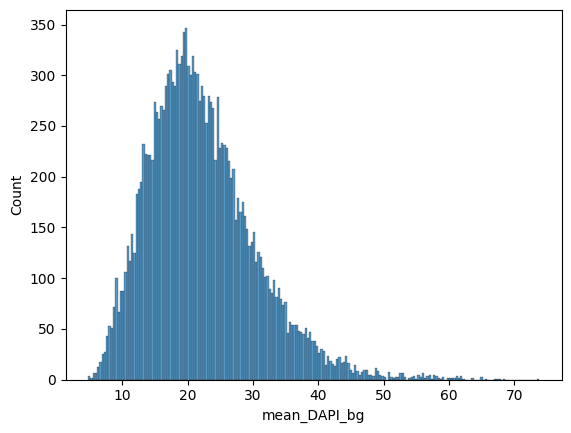

In [11]:
df = pd.DataFrame(data=adata.X, columns=adata.var_names)
sns.histplot(data=df, x="mean_DAPI_bg", bins=200)

In [12]:
adata = dvp.tl.filter_by_abs_value(adata=adata,feature_name="mean_DAPI_bg", lower_bound=0.01, upper_bound=0.99, mode="quantile")

15:14:07.13 | INFO | Starting filter_by_abs_value for feature 'mean_DAPI_bg'...
15:14:07.13 | INFO | Feature 'mean_DAPI_bg' identified from adata.X.
15:14:07.13 | INFO | Keeping cells with 'mean_DAPI_bg' >= 8.0822 (from quantile bound: 0.01).
15:14:07.13 | INFO | Keeping cells with 'mean_DAPI_bg' <= 47.2041 (from quantile bound: 0.99).
15:14:07.13 | SUCCESS | 16470 of 16808 cells (97.99%) passed the filter.
15:14:07.13 | INFO | New boolean column 'mean_DAPI_bg_filter' added to adata.obs.


In [13]:
adata.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
0           1    17.612598    53.337008  1270.0        48.198269   
1           2     6.598958   126.006944   576.0        45.835698   
2           3    17.416667   156.656504   984.0        40.751104   
3           4     4.982558   179.337209   344.0        34.620290   
4           5    19.159558   228.598210  1899.0        54.446578   
...       ...          ...          ...     ...              ...   
16803   16804  4993.579685   106.373030   571.0        52.291050   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  \
0            36.841132      0.644782     0.359469  146.669048  0.949178   
1            18.372329      0.916152     1.513685  113.112698  0.886154   
2            31.700565      0.628380    -1.528462  121.396970  0.955340   
3            13.577757      0.919884     1.474818   82.627417  0.971751   
4            49.053930      0.433912     1.287374  196.610173  0.896601   
...                ...           ...          ...         ...       ...   
16803        14.719719      0.959562    -1.563557  116.870058  0.976068   
16804        14.334812      0.933940     1.531591   90.970563  0.962637   
16805        13.112118      0.966202     1.538209  111.248737  0.951923   
16806        13.495126      0.884686    -1.561806   69.213203  0.973856   
16807        13.027177      0.920429    -1.564638   77.213203  0.984756   

       Area_filter  mean_DAPI_bg_filter  
0             True                 True  
1             True                 True  
2             True                 True  
3             True                 True  
4             True                 True  
...            ...                  ...  
16803         True                 True  
16804         True                 True  
16805         True                 True  
16806         True                 True  
16807         True                 True  

[16808 rows x 12 columns]

### Filter by ratio of nuclear stain between last and first DAPI images

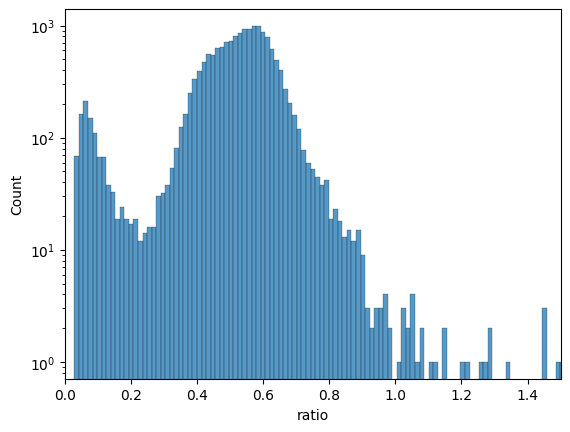

In [14]:
df = pd.DataFrame(data=adata.X, columns=adata.var_names)
df['ratio'] = df['mean_DAPI_2'] / df['mean_DAPI_bg']

fig,ax = plt.subplots()
sns.histplot(data=df, x="ratio", bins=200, ax=ax)
ax.set_xlim(0,1.5)
ax.set_yscale('log')

In [15]:
adata = dvp.tl.filter_by_ratio(adata=adata, end_cycle="mean_DAPI_2", start_cycle="mean_DAPI_bg", label="DAPI", min_ratio=0.25, max_ratio=1.05)

15:14:07.44 | INFO | Starting filter_by_ratio...
15:14:07.44 | INFO | Number of cells with DAPI ratio < 0.25: 1035
15:14:07.44 | INFO | Number of cells with DAPI ratio > 1.05: 28
15:14:07.44 | INFO | Cells with DAPI ratio between 0.25 and 1.05: 15745
15:14:07.44 | INFO | Cells filtered: 6.32%
15:14:07.44 | SUCCESS | filter_by_ratio complete.


### Filter by manual annotations

In [16]:
#check annotations
gdf = gpd.read_file("data/manual_artefact_annotations/artefacts.geojson")

In [17]:
gdf

id  objectType  \
0  9dbac0eb-6171-4da8-9c3f-846ecdb81dfb  annotation   
1  cc4df5d0-fe6b-4285-849a-698851827e9c  annotation   
2  e6aaf657-f4e7-401f-834b-a2fd5a072300  annotation   
3  be635097-4631-46e7-b1a8-878363184124  annotation   
4  baff029c-3349-4fa2-946a-0f5e55c46dc8  annotation   
5  ad114d98-3048-4e3c-9a94-982e72a95515  annotation   
6  99a65f87-acf2-434d-9ab5-7692e39af63b  annotation   
7  7908eec6-399d-4e17-90ba-26446b5dcacd  annotation   
8  f1021867-a0ec-4323-8cf9-d9d70063566a  annotation   
9  46b88b7d-3f7f-4a7d-812d-5ae37a6090cb  annotation   

                                      classification  \
0  { "name": "folded_tissue", "color": [ 176, 102...   
1  { "name": "Antibody_clumps", "color": [ 32, 19...   
2  { "name": "folded_tissue", "color": [ 176, 102...   
3  { "name": "CD8_noise", "color": [ 51, 236, 220...   
4  { "name": "Antibody_clumps", "color": [ 32, 19...   
5  { "name": "Antibody_clumps", "color": [ 32, 19...   
6  { "name": "Antibody_clumps", "color": [ 32, 19...   
7  { "name": "Antibody_clumps", "color": [ 32, 19...   
8  { "name": "CD8_noise", "color": [ 51, 236, 220...   
9  { "name": "folded_tissue", "color": [ 176, 102...   

                                            geometry  
0  POLYGON ((722 2645, 702 2647, 689.93 2650.81, ...  
1  POLYGON ((4685 2530, 4682 2531, 4677 2531, 467...  
2  POLYGON ((3127 3675, 3119 3676, 3116 3677, 311...  
3  POLYGON ((117 3008, 110 3009.62, 105 3010, 96....  
4  POLYGON ((3987 4058, 3984 4059, 3979 4059, 397...  
5  POLYGON ((4791 1546, 4788.47 1546.95, 4788 154...  
6  POLYGON ((4636 1840, 4628 1843, 4620 1847, 461...  
7  POLYGON ((4693 2599, 4690 2600, 4685 2600, 468...  
8  POLYGON ((3 1994, 0 1994.23, 0 2047.23, 0 2052...  
9  POLYGON ((1745 18, 1743.71 18.43, 1738 19, 172...

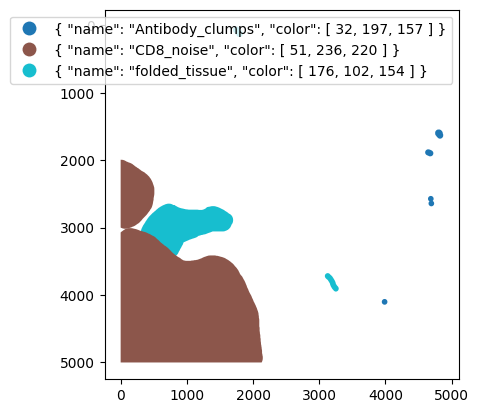

In [18]:
fig,ax = plt.subplots()
gdf.plot(column="classification", legend=True, figsize=(8, 6), ax=ax)
ax.invert_yaxis()
plt.show()

In [19]:
adata.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
0           1    17.612598    53.337008  1270.0        48.198269   
1           2     6.598958   126.006944   576.0        45.835698   
2           3    17.416667   156.656504   984.0        40.751104   
3           4     4.982558   179.337209   344.0        34.620290   
4           5    19.159558   228.598210  1899.0        54.446578   
...       ...          ...          ...     ...              ...   
16803   16804  4993.579685   106.373030   571.0        52.291050   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  \
0            36.841132      0.644782     0.359469  146.669048  0.949178   
1            18.372329      0.916152     1.513685  113.112698  0.886154   
2            31.700565      0.628380    -1.528462  121.396970  0.955340   
3            13.577757      0.919884     1.474818   82.627417  0.971751   
4            49.053930      0.433912     1.287374  196.610173  0.896601   
...                ...           ...          ...         ...       ...   
16803        14.719719      0.959562    -1.563557  116.870058  0.976068   
16804        14.334812      0.933940     1.531591   90.970563  0.962637   
16805        13.112118      0.966202     1.538209  111.248737  0.951923   
16806        13.495126      0.884686    -1.561806   69.213203  0.973856   
16807        13.027177      0.920429    -1.564638   77.213203  0.984756   

       Area_filter  mean_DAPI_bg_filter  DAPI_ratio  DAPI_ratio_pass  
0             True                 True    0.065991            False  
1             True                 True    0.107462            False  
2             True                 True    0.098039            False  
3             True                 True    0.136228            False  
4             True                 True    0.104794            False  
...            ...                  ...         ...              ...  
16803         True                 True    0.209647            False  
16804         True                 True    0.477926             True  
16805         True                 True    0.268536             True  
16806         True                 True    0.523596             True  
16807         True                 True    0.401436             True  

[16808 rows x 14 columns]

In [20]:
adata = dvp.tl.filter_by_annotation(adata=adata, path_to_geojson="data/manual_artefact_annotations/artefacts.geojson")

15:14:08.83 | INFO |  Each class of annotation will be a different column in adata.obs
15:14:08.83 | INFO |  TRUE means cell was inside annotation, FALSE means cell not in annotation
15:14:08.84 | INFO | GeoJSON loaded, detected: 10 annotations


In [21]:
adata.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
0           1    17.612598    53.337008  1270.0        48.198269   
1           2     6.598958   126.006944   576.0        45.835698   
2           3    17.416667   156.656504   984.0        40.751104   
3           4     4.982558   179.337209   344.0        34.620290   
4           5    19.159558   228.598210  1899.0        54.446578   
...       ...          ...          ...     ...              ...   
16803   16804  4993.579685   106.373030   571.0        52.291050   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  \
0            36.841132      0.644782     0.359469  146.669048  0.949178   
1            18.372329      0.916152     1.513685  113.112698  0.886154   
2            31.700565      0.628380    -1.528462  121.396970  0.955340   
3            13.577757      0.919884     1.474818   82.627417  0.971751   
4            49.053930      0.433912     1.287374  196.610173  0.896601   
...                ...           ...          ...         ...       ...   
16803        14.719719      0.959562    -1.563557  116.870058  0.976068   
16804        14.334812      0.933940     1.531591   90.970563  0.962637   
16805        13.112118      0.966202     1.538209  111.248737  0.951923   
16806        13.495126      0.884686    -1.561806   69.213203  0.973856   
16807        13.027177      0.920429    -1.564638   77.213203  0.984756   

       Area_filter  mean_DAPI_bg_filter  DAPI_ratio  DAPI_ratio_pass  \
0             True                 True    0.065991            False   
1             True                 True    0.107462            False   
2             True                 True    0.098039            False   
3             True                 True    0.136228            False   
4             True                 True    0.104794            False   
...            ...                  ...         ...              ...   
16803         True                 True    0.209647            False   
16804         True                 True    0.477926             True   
16805         True                 True    0.268536             True   
16806         True                 True    0.523596             True   
16807         True                 True    0.401436             True   

       Antibody_clumps  CD8_noise  folded_tissue    ANY   annotation  
0                False      False          False  False  Unannotated  
1                False      False          False  False  Unannotated  
2                False      False          False  False  Unannotated  
3                False      False          False  False  Unannotated  
4                False      False          False  False  Unannotated  
...                ...        ...            ...    ...          ...  
16803            False       True          False   True    CD8_noise  
16804            False       True          False   True    CD8_noise  
16805            False       True          False   True    CD8_noise  
16806            False       True          False   True    CD8_noise  
16807            False      False          False  False  Unannotated  

[16808 rows x 19 columns]

In [22]:
# new processed adata
adata_processed = adata[
    (adata.obs["Area_filter"])
    & (adata.obs["DAPI_ratio_pass"])
    & (~adata.obs["Antibody_clumps"])
    & (~adata.obs["folded_tissue"])
].copy() # type: ignore

/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [23]:
adata

AnnData object with n_obs × n_vars = 16808 × 15
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'Area_filter', 'mean_DAPI_bg_filter', 'DAPI_ratio', 'DAPI_ratio_pass', 'Antibody_clumps', 'CD8_noise', 'folded_tissue', 'ANY', 'annotation'

In [24]:
adata_processed

AnnData object with n_obs × n_vars = 15244 × 15
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'Area_filter', 'mean_DAPI_bg_filter', 'DAPI_ratio', 'DAPI_ratio_pass', 'Antibody_clumps', 'CD8_noise', 'folded_tissue', 'ANY', 'annotation'

### QuPath QC

In [25]:
gdf = gpd.read_file("outputs/segmentation_for_qupath.geojson")
gdf.head()

label objectType                                           geometry
0      1  detection  POLYGON ((60 43.5, 54 43.5, 46.5 39, 42.5 30, ...
1      2  detection  POLYGON ((134 19.5, 129 19.5, 126 15.5, 119 11...
2      3  detection  POLYGON ((167 31.5, 148 33.5, 142 30.5, 137.5 ...
3      4  detection  POLYGON ((188 13.5, 178 13.5, 167 7.5, 160.5 1...
4      5  detection  POLYGON ((235 48.5, 231 47.5, 220 39.5, 202.5 ...

In [26]:
adata.obs.head()

CellID  Y_centroid  X_centroid    Area  MajorAxisLength  MinorAxisLength  \
0       1   17.612598   53.337008  1270.0        48.198269        36.841132   
1       2    6.598958  126.006944   576.0        45.835698        18.372329   
2       3   17.416667  156.656504   984.0        40.751104        31.700565   
3       4    4.982558  179.337209   344.0        34.620290        13.577757   
4       5   19.159558  228.598210  1899.0        54.446578        49.053930   

   Eccentricity  Orientation      Extent  Solidity  Area_filter  \
0      0.644782     0.359469  146.669048  0.949178         True   
1      0.916152     1.513685  113.112698  0.886154         True   
2      0.628380    -1.528462  121.396970  0.955340         True   
3      0.919884     1.474818   82.627417  0.971751         True   
4      0.433912     1.287374  196.610173  0.896601         True   

   mean_DAPI_bg_filter  DAPI_ratio  DAPI_ratio_pass  Antibody_clumps  \
0                 True    0.065991            False            False   
1                 True    0.107462            False            False   
2                 True    0.098039            False            False   
3                 True    0.136228            False            False   
4                 True    0.104794            False            False   

   CD8_noise  folded_tissue    ANY   annotation  
0      False          False  False  Unannotated  
1      False          False  False  Unannotated  
2      False          False  False  Unannotated  
3      False          False  False  Unannotated  
4      False          False  False  Unannotated

In [27]:
# check processed cells in qupath
cells = dvp.io.adata_to_qupath(
    adata=adata_processed, 
    geodataframe=gdf,
    adataobs_on="CellID",
    gdf_on="label",
    classify_by=None,
    simplify_value=None,
    save_as_detection=True)

15:14:09.23 | INFO | Found 15244 matching IDs between adata.obs['CellID'] and geodataframe['label'].


In [28]:
cells.to_file("outputs/filtered_cells.geojson")

### Napari QC not quite possible without spatialdata object, check tutorial #3

## Phenotype my cells

In [29]:
help(dvp.pp.impute_marker_with_annotation)

Help on function impute_marker_with_annotation in module opendvp.pp.impute_marker_with_annotation:

impute_marker_with_annotation(adata: anndata._core.anndata.AnnData, target_variable: str, target_annotation_column: str, quantile_for_imputation: float = 0.05) -> anndata._core.anndata.AnnData
    Change value of a feature in an AnnData object for rows matching a specific annotation.
    
    Using a specified quantile value from the variable's distribution.
    
    Parameters:
    ----------
    adata : ad.AnnData
        The annotated data matrix.
    target_variable : str
        The variable (gene/feature) to impute.
    target_annotation_column : str
        The column in adata.obs to use for selecting rows to impute.
    quantile_for_imputation : float, optional
        The quantile to use for imputation (default is 0.05).
    
    Returns:
    -------
    ad.AnnData
        A copy of the AnnData object with imputed values.



In [30]:
adata.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
0           1    17.612598    53.337008  1270.0        48.198269   
1           2     6.598958   126.006944   576.0        45.835698   
2           3    17.416667   156.656504   984.0        40.751104   
3           4     4.982558   179.337209   344.0        34.620290   
4           5    19.159558   228.598210  1899.0        54.446578   
...       ...          ...          ...     ...              ...   
16803   16804  4993.579685   106.373030   571.0        52.291050   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  \
0            36.841132      0.644782     0.359469  146.669048  0.949178   
1            18.372329      0.916152     1.513685  113.112698  0.886154   
2            31.700565      0.628380    -1.528462  121.396970  0.955340   
3            13.577757      0.919884     1.474818   82.627417  0.971751   
4            49.053930      0.433912     1.287374  196.610173  0.896601   
...                ...           ...          ...         ...       ...   
16803        14.719719      0.959562    -1.563557  116.870058  0.976068   
16804        14.334812      0.933940     1.531591   90.970563  0.962637   
16805        13.112118      0.966202     1.538209  111.248737  0.951923   
16806        13.495126      0.884686    -1.561806   69.213203  0.973856   
16807        13.027177      0.920429    -1.564638   77.213203  0.984756   

       Area_filter  mean_DAPI_bg_filter  DAPI_ratio  DAPI_ratio_pass  \
0             True                 True    0.065991            False   
1             True                 True    0.107462            False   
2             True                 True    0.098039            False   
3             True                 True    0.136228            False   
4             True                 True    0.104794            False   
...            ...                  ...         ...              ...   
16803         True                 True    0.209647            False   
16804         True                 True    0.477926             True   
16805         True                 True    0.268536             True   
16806         True                 True    0.523596             True   
16807         True                 True    0.401436             True   

       Antibody_clumps  CD8_noise  folded_tissue    ANY   annotation  
0                False      False          False  False  Unannotated  
1                False      False          False  False  Unannotated  
2                False      False          False  False  Unannotated  
3                False      False          False  False  Unannotated  
4                False      False          False  False  Unannotated  
...                ...        ...            ...    ...          ...  
16803            False       True          False   True    CD8_noise  
16804            False       True          False   True    CD8_noise  
16805            False       True          False   True    CD8_noise  
16806            False       True          False   True    CD8_noise  
16807            False      False          False  False  Unannotated  

[16808 rows x 19 columns]

In [31]:
adata_CD8 = dvp.pp.impute_marker_with_annotation(
    adata=adata_processed,
    target_variable="mean_CD8", 
    target_annotation_column="CD8_noise",
    quantile_for_imputation=0.15
    )

15:14:09.64 | INFO | Imputing with 0.15% percentile value = 7.545454545454546


In [ ]:
gates = dvp.io.import_thresholds(gates_csv_path="data/phenotyping/gates.csv")
gates

15:14:09.66 | INFO | Filtering out all rows with value 0.0 (assuming not gated)
15:14:09.66 | INFO | Found 8 valid gates
15:14:09.66 | INFO | Markers found: ['mean_Vimentin' 'mean_CD3e' 'mean_panCK' 'mean_CD8' 'mean_COL1A1'
 'mean_CD20' 'mean_CD68' 'mean_Ki67']
15:14:09.66 | INFO | Samples found: ['TD_15_TNBC_subset']
15:14:09.66 | INFO | Applying log1p transformation to gate values and formatting for scimap.
15:14:09.66 | INFO |    Output DataFrame columns: ['markers', 'TD_15_TNBC_subset']


markers  TD_15_TNBC_subset
5   mean_Vimentin           1.915886
6       mean_CD3e           2.138796
7      mean_panCK           1.287972
8        mean_CD8           2.890372
10    mean_COL1A1           3.169333
11      mean_CD20           3.205329
12      mean_CD68           1.436576
13      mean_Ki67           1.093354

In [38]:
adata_phenotyping = adata_CD8[:,adata_CD8.var_names.isin(gates['markers'])].copy()
adata_phenotyping.obs['sample_id'] = "TD_15_TNBC_subset"

In [40]:
# seems that I will have to:
# create adata for gating by filtering unused columns
adata_rescaled = dvp.pp.rescale(
                        adata=adata_phenotyping,
                        gate=gates,
                        method="all",
                        imageid="sample_id"
                        )


Scaling Image: TD_15_TNBC_subset
Scaling mean_Vimentin (gate: 1.916)
Scaling mean_CD3e (gate: 2.139)
Scaling mean_panCK (gate: 1.288)
Scaling mean_CD8 (gate: 2.890)
Scaling mean_COL1A1 (gate: 3.169)
Scaling mean_CD20 (gate: 3.205)
Scaling mean_CD68 (gate: 1.437)
Scaling mean_Ki67 (gate: 1.093)


/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/opendvp/pp/rescale.py:145: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gate_mapping['gate'] = gate_mapping['gate'].fillna(gate_mapping['m_gate'])


In [41]:
# load the phenotyping workflow
phenotype = pd.read_csv('data/phenotyping/celltype_matrix.csv')
phenotype.style.format(na_rep='')

In [47]:
adata_phenotyping.var['feature_name']  = [name.split("_")[1] for name in adata_phenotyping.var_names]
adata_phenotyping.var.index = adata_phenotyping.var['feature_name'].values

In [49]:
adata_phenotyped = dvp.tl.phenotype_cells(
    adata_phenotyping, 
    phenotype=phenotype, 
    label="phenotype",
    verbose=True) 

Phenotyping Epithelial
Phenotyping Mesenchymal
Phenotyping Immune
Phenotyping Fibroblasts
-- Subsetting Immune
Phenotyping CD4_T_cell
Phenotyping CD8_T_cell
Phenotyping B_cell
Phenotyping Macrophage
Consolidating the phenotypes across all groups


/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/opendvp/tl/phenotype_cells.py:290: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  phenotype_labels_Consolidated = phenotype_labels.fillna(method='ffill', axis = 1)
/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/opendvp/tl/phenotype_cells.py:290: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  phenotype_labels_Consolidated = phenotype_labels.fillna(method='ffill', axis = 1)


In [51]:
adata_phenotyped.obs

CellID   Y_centroid   X_centroid    Area  MajorAxisLength  \
6           7    28.019009   321.572980  1473.0        57.990373   
7           8    13.004021   351.318365  1492.0        60.422292   
8           9     8.195719   415.693170   981.0        62.489467   
9          10     9.020833   482.729167   576.0        34.660038   
10         11    11.670357   554.346863   813.0        36.506883   
...       ...          ...          ...     ...              ...   
16801   16802  4992.956322   561.156322   435.0        36.423914   
16804   16805  4993.413242   810.385845   438.0        40.105247   
16805   16806  4994.153535   645.010101   495.0        50.864135   
16806   16807  4993.835570  1244.718121   298.0        28.947821   
16807   16808  4994.250774  4186.876161   323.0        33.325316   

       MinorAxisLength  Eccentricity  Orientation      Extent  Solidity  ...  \
6            34.056846      0.809381     0.702143  160.367532  0.943022  ...   
7            35.485098      0.809380     1.459721  167.917785  0.965071  ...   
8            20.854657      0.942668    -1.541497  144.769553  0.974181  ...   
9            21.747314      0.778660    -1.556045   93.698485  0.963211  ...   
10           29.531264      0.587914    -1.567206  109.355339  0.975990  ...   
...                ...           ...          ...         ...       ...  ...   
16801        15.810187      0.900884    -1.561879   87.798990  0.966667  ...   
16804        14.334812      0.933940     1.531591   90.970563  0.962637  ...   
16805        13.112118      0.966202     1.538209  111.248737  0.951923  ...   
16806        13.495126      0.884686    -1.561806   69.213203  0.973856  ...   
16807        13.027177      0.920429    -1.564638   77.213203  0.984756  ...   

       mean_DAPI_bg_filter  DAPI_ratio  DAPI_ratio_pass  Antibody_clumps  \
6                     True    0.503327             True            False   
7                     True    0.563896             True            False   
8                     True    0.473116             True            False   
9                     True    0.526049             True            False   
10                    True    0.649908             True            False   
...                    ...         ...              ...              ...   
16801                 True    0.461031             True            False   
16804                 True    0.477926             True            False   
16805                 True    0.268536             True            False   
16806                 True    0.523596             True            False   
16807                 True    0.401436             True            False   

       CD8_noise  folded_tissue    ANY   annotation          sample_id  \
6          False          False  False  Unannotated  TD_15_TNBC_subset   
7          False          False  False  Unannotated  TD_15_TNBC_subset   
8          False          False  False  Unannotated  TD_15_TNBC_subset   
9          False          False  False  Unannotated  TD_15_TNBC_subset   
10         False          False  False  Unannotated  TD_15_TNBC_subset   
...          ...            ...    ...          ...                ...   
16801       True          False   True    CD8_noise  TD_15_TNBC_subset   
16804       True          False   True    CD8_noise  TD_15_TNBC_subset   
16805       True          False   True    CD8_noise  TD_15_TNBC_subset   
16806       True          False   True    CD8_noise  TD_15_TNBC_subset   
16807      False          False  False  Unannotated  TD_15_TNBC_subset   

         phenotype  
6       Epithelial  
7       Epithelial  
8          Unknown  
9       CD4_T_cell  
10         Unknown  
...            ...  
16801  Fibroblasts  
16804      Unknown  
16805  Fibroblasts  
16806      Unknown  
16807      Unknown  

[15244 rows x 21 columns]

In [55]:
adata = adata_CD8.copy()

In [56]:
adata.obs = adata_phenotyped.obs.copy()

In [57]:
adata

AnnData object with n_obs × n_vars = 15244 × 15
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'Area_filter', 'mean_DAPI_bg_filter', 'DAPI_ratio', 'DAPI_ratio_pass', 'Antibody_clumps', 'CD8_noise', 'folded_tissue', 'ANY', 'annotation', 'sample_id', 'phenotype'

### QC phenotypes

In [ ]:
#Qupath shapes

## Cellular neighborhoods